In [1]:
import pandas as pd


# Load data
train_df = pd.read_csv('~/data/Germany_time_zone/all/train_with_all.csv')
test_df = pd.read_csv('~/data/Germany_time_zone/all/test_with_all.csv')

# Convert to UTC while handling DST ambiguities
train_df['ds'] = pd.to_datetime(train_df['ds']).dt.tz_localize('Europe/Berlin', ambiguous='infer').dt.tz_convert('UTC')
test_df['ds'] = pd.to_datetime(test_df['ds']).dt.tz_localize('Europe/Berlin', ambiguous='infer').dt.tz_convert('UTC')

# Check date ranges
print("First date in train_df:", train_df['ds'].min())
print("Last date in train_df:", train_df['ds'].max())
print("First date in test_df:", test_df['ds'].min())
print("Last date in test_df:", test_df['ds'].max())


calendar_features = ['month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos', 
                     'hour_sin', 'hour_cos', 'is_holiday', 'is_weekend']
gas_price_features = ['gas_price']
synthetic_price_features = ['co2_emission_allowances', 'synthetic_price']
load_features = ['load']
renewable_features = ['renewable', 'non_renewable']
cross_border_features = ['cross_border_trading']

# Define the exogenous variable lists
stat_exog_list = [] 
hist_exog_list = (
    calendar_features
    + gas_price_features
    + synthetic_price_features
    + load_features
    + renewable_features
    + cross_border_features
)

futr_exog_list = (
    calendar_features
)



First date in train_df: 2018-09-30 22:00:00+00:00
Last date in train_df: 2023-12-31 22:00:00+00:00
First date in test_df: 2023-12-31 23:00:00+00:00
Last date in test_df: 2024-12-31 22:00:00+00:00


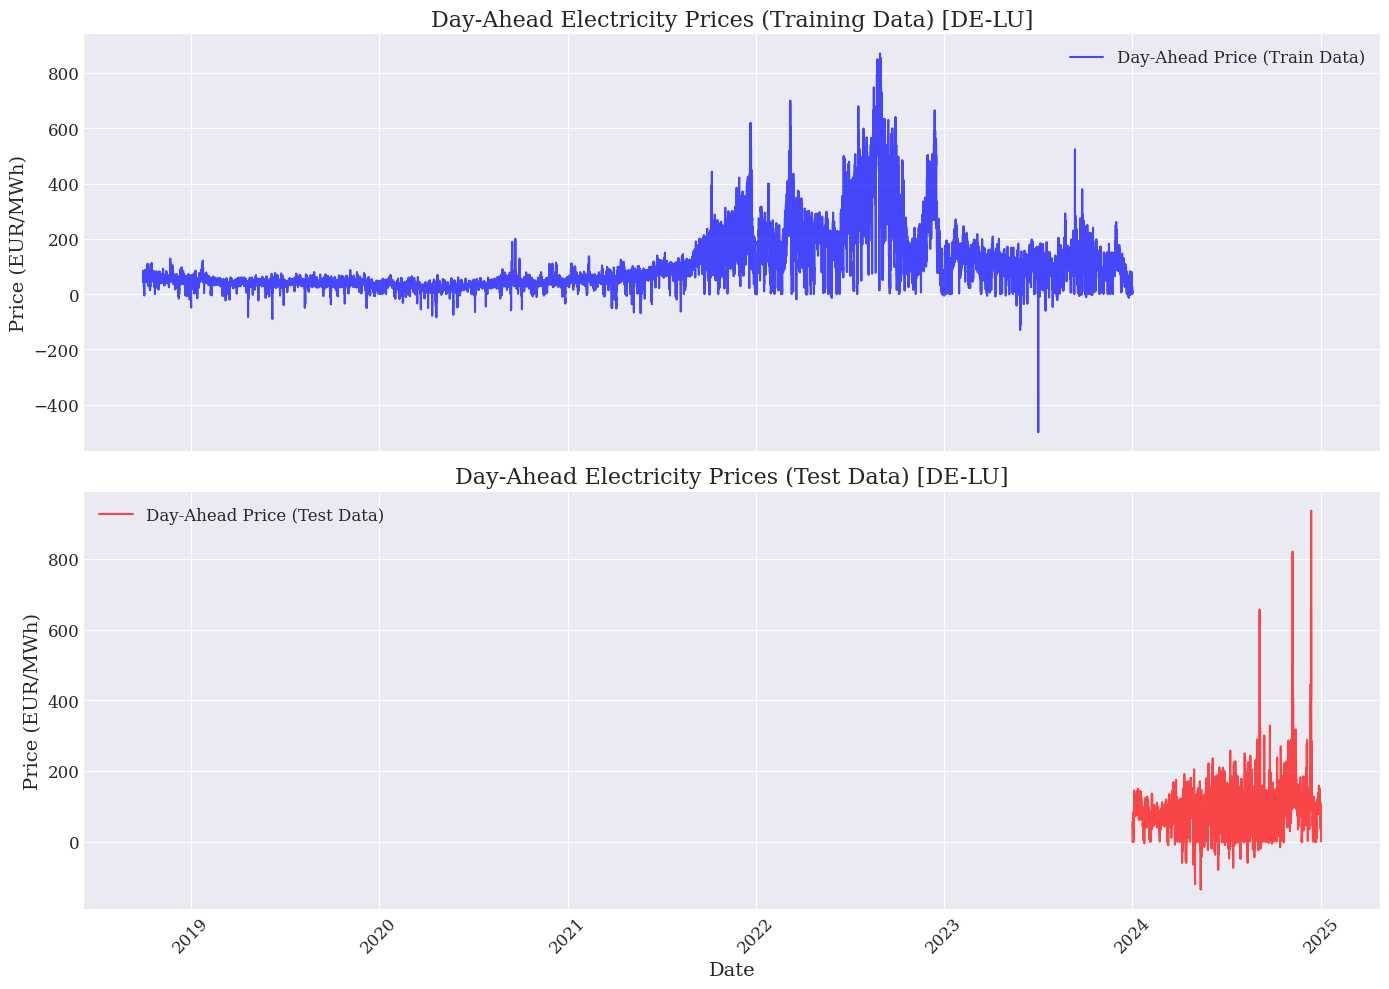

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set high-quality plotting parameters
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'figure.figsize': (14, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'lines.linewidth': 1.5,
    'savefig.dpi': 300,
    'font.family': 'serif'
})

# Create two subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)  # Shared x-axis

# Train data plot
axes[0].plot(train_df['ds'], train_df['y'], label='Day-Ahead Price (Train Data)', color='blue', alpha=0.7)
axes[0].set_title('Day-Ahead Electricity Prices (Training Data) [DE-LU]')
axes[0].set_ylabel('Price (EUR/MWh)')
axes[0].legend()

# Test data plot
axes[1].plot(test_df['ds'], test_df['y'], label='Day-Ahead Price (Test Data)', color='red', alpha=0.7)
axes[1].set_title('Day-Ahead Electricity Prices (Test Data) [DE-LU]')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (EUR/MWh)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Show plot
plt.tight_layout()
plt.show()

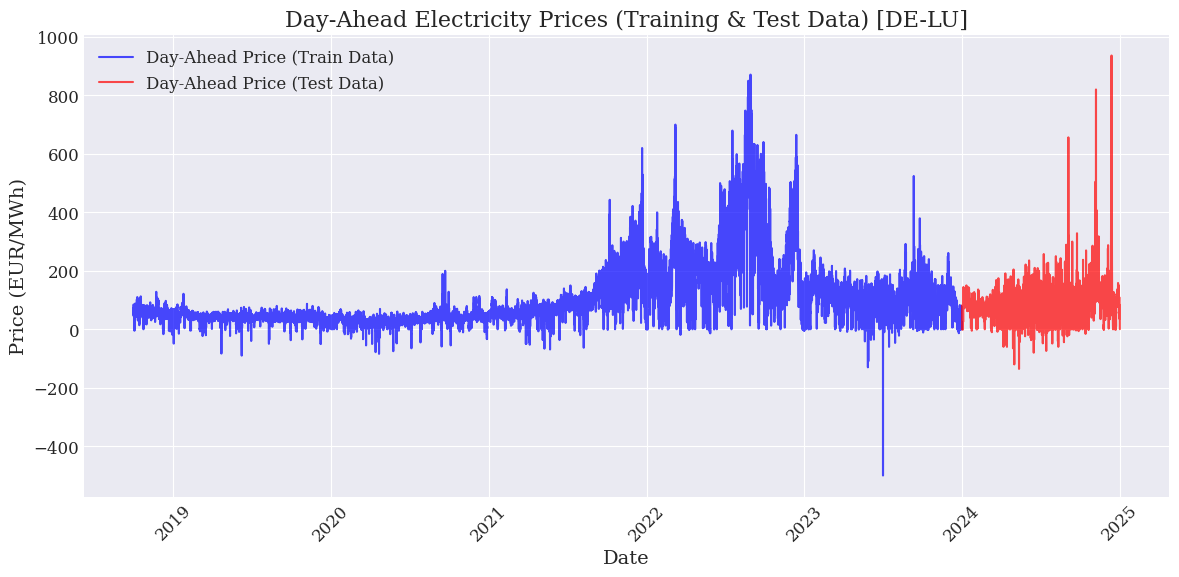

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set high-quality plotting parameters
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'figure.figsize': (14, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'lines.linewidth': 1.5,
    'savefig.dpi': 300,
    'font.family': 'serif'
})

# Plot train and test data
fig, ax = plt.subplots()

ax.plot(train_df['ds'], train_df['y'], label='Day-Ahead Price (Train Data)', color='blue', alpha=0.7)
ax.plot(test_df['ds'], test_df['y'], label='Day-Ahead Price (Test Data)', color='red', alpha=0.7)

# Improve readability
ax.set_title('Day-Ahead Electricity Prices (Training & Test Data) [DE-LU]')
ax.set_xlabel('Date')
ax.set_ylabel('Price (EUR/MWh)')
ax.legend()
ax.tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Show plot
plt.show()

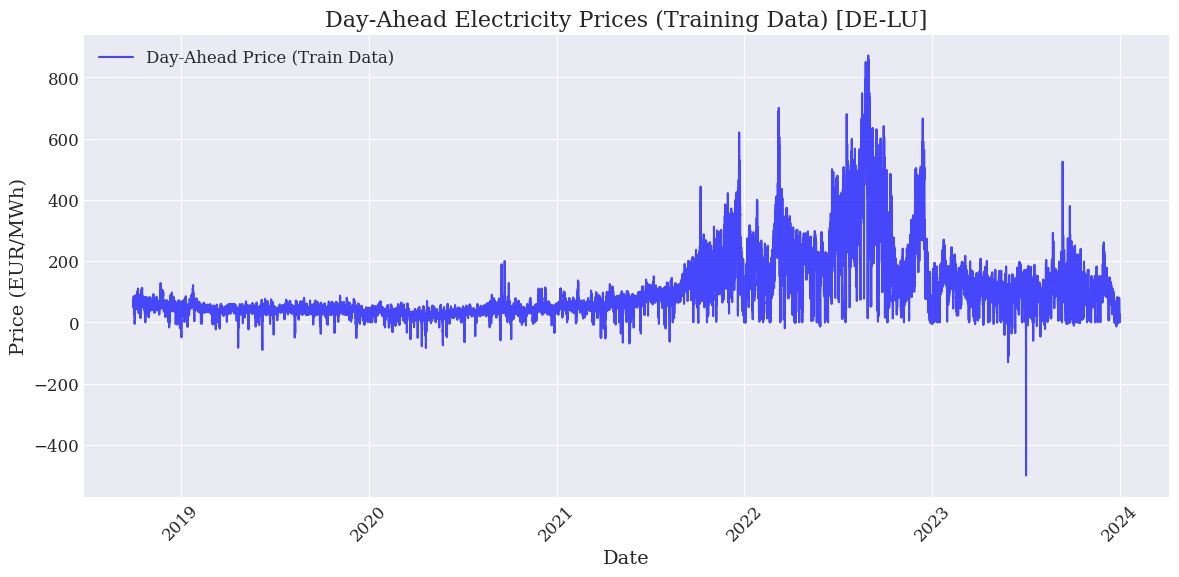

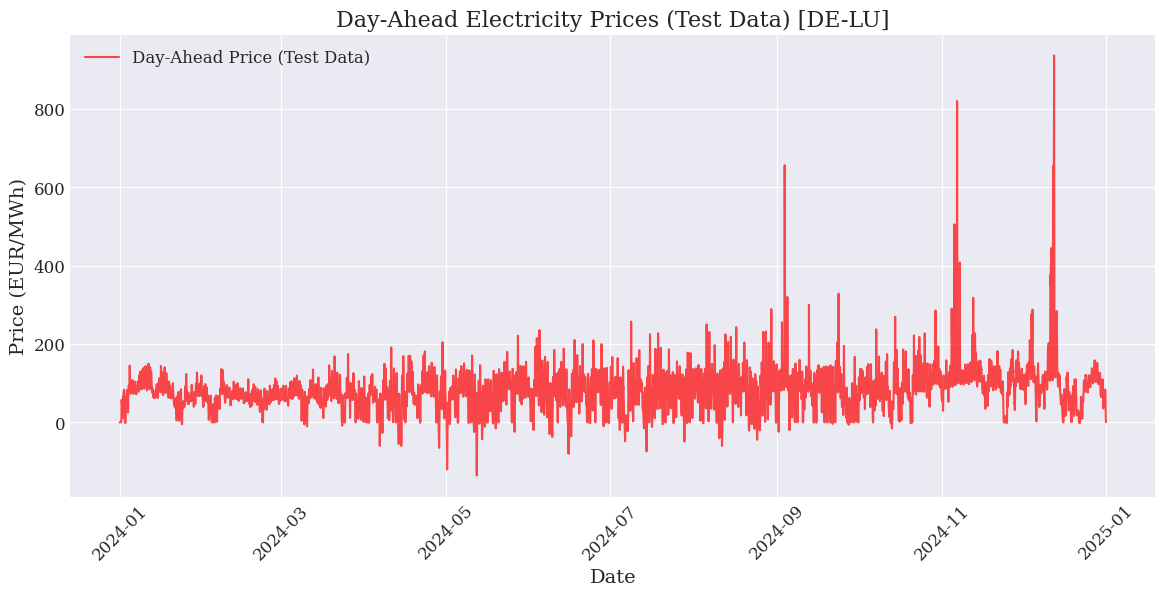

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set high-quality plotting parameters
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({
    'figure.figsize': (14, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'lines.linewidth': 1.5,
    'savefig.dpi': 300,
    'font.family': 'serif'
})

# Plot Training Data
plt.figure(figsize=(14, 6))
plt.plot(train_df['ds'], train_df['y'], label='Day-Ahead Price (Train Data)', color='blue', alpha=0.7)
plt.title('Day-Ahead Electricity Prices (Training Data) [DE-LU]')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))  # Limit x-axis ticks
plt.show()

# Plot Test Data
plt.figure(figsize=(14, 6))
plt.plot(test_df['ds'], test_df['y'], label='Day-Ahead Price (Test Data)', color='red', alpha=0.7)
plt.title('Day-Ahead Electricity Prices (Test Data) [DE-LU]')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(10))  # Limit x-axis ticks
plt.show()